In [31]:
#  I need to Install Tensorlow using command 
!pip install -q tensorflow-gpu==2.7.0

Get the version 

In [32]:
try :
  %tensorflow_version 2.x 
except Exception:
    pass

import tensorflow as tf 
print(tf.__version__)

2.7.0


All my imports 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# here i import the layer that i need to create 1 demesion neural netword 
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D, MaxPool1D, Embedding
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras import layers
# here a import Tokenizer and pad_seqeunces in order to preprocess text 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences





```
# I import ny  dataset that i have (train, val, test) 

# I use pandas to read the Data and also renames the columns

In [34]:
# Train Data
data_train = pd.read_csv('/content/train.csv', names=['sentence', 'label'])
# Validation Data 
data_val = pd.read_csv('/content/val.csv', names=['sentence', 'label'])
# Test Data 
data_test = pd.read_csv('/content/test.csv', names=['sentence', 'label'])

Here i check the Data using .head

In [35]:
data_train.head()

,sentence,label
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1


In [36]:
# I store the reviews and the labels in  arrays 

reviews = data_train['sentence'].values  
label = data_train['label'].values  

reviewstest = data_test['sentence'].values
labeltest = data_test['label'].values 

reviewsval = data_val['sentence'].values  
labelval =   data_val['label'].values 

In [37]:
reviews_train, y_train  = (reviews, label)
reviewsVal, y_Val  = (reviewsval, labelval)
reviewstest, y_test  = (reviewstest, labeltest)

In [38]:
#print(reviews_train)

Here I Convert sentences to sequences using the Tokenizer , first i called the fit_on_text on a trainset and i called text_to_sequebces for train, validation, text, this give me a sequences train and sequennces validation and also for test


In [39]:
MAX_VOCAB_S = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_S)
tokenizer.fit_on_texts(reviews_train)
# new variable X_train and y_train and X_test
seq_train = tokenizer.texts_to_sequences(reviews_train)
seq_val = tokenizer.texts_to_sequences(reviewsVal)
seq_test = tokenizer.texts_to_sequences(reviewstest)

I get the word index mapping and also vocabulary size V,   37252 tokens

In [40]:
wordToIndex = tokenizer.word_index
V = len(wordToIndex) + 1  
print(reviews_train[0])
print(seq_train[0])
V

note : some may consider portions of the following text to be spoilers .  be forewarned .  it's startling to consider that it was only a few years ago that film distributors would worriedly rearrange their summer release schedules in order to give the annual disney animated feature juggernaut a wide berth .  the lion king had just cracked $300 million domestic in gross to become one of the most profitable ventures in film history , continuing to build on a sturdy base left by prior flicks aladdin and beauty and the beast .  since then , though , disney's animated features have shown an unbroken string of diminishing returns , with pocahontas , the hunchback of notre dame , and this year's hercules successively proving less and less potent .  with the once seemingly-impregnable disney stranglehold on the market share suddenly looking mighty vulnerable , and faced with their first serious competition in the animated film market from fox's anastasia , disney has brought xmas home early by

37252



```
# Ce texte est au format code
```

I called the pad_sequences to pad trainset 

In [41]:
data_train = pad_sequences(seq_train)
print('Shape  of the data train : ', data_train.shape )
T = data_train.shape[1]


Shape  of the data train :  (1400, 2299)


I called the pad_sequences to pad valtest using 2299 as maxlen

In [42]:
data_val = pad_sequences(seq_val, maxlen=T)
print('Shape  of the data val : ', data_val.shape )

Shape  of the data val :  (200, 2299)


I i called the pad_sequences to pad the testset  using 2299 as **maxlen**

In [43]:
data_test = pad_sequences(seq_test,maxlen=T)
print('Shape  of the data test : ', data_test.shape )

Shape  of the data test :  (400, 2299)


**Creating of the model**

I stared by Embedding layer dimensionality  D = 50 
than i will have convolutional layer follow by Globalmaxpooling 


In [44]:
D = 50
i = Input(shape=(T,))
x = Embedding(V, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPool1D()(x)
x = Dense(10, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [45]:
  #D = 50
  #i = Input(shape=(T,))
  #x = Embedding(V, D)(i)
  #x = Conv1D(32, 3, activation='relu')(x)
  #x = MaxPool1D(3)(x)
  #x = Conv1D(64, 3, activation='relu')(x)
  #x = MaxPool1D(3)(x)
  #x = Conv1D(128, 3, activation='relu')(x)
  #x = GlobalMaxPool1D()(x)
  #x = Dense(1, activation='sigmoid')(x)
  #model = Model(i, x)
 

**for Compile and fitting the**

i called model.compile and model.fil

In [46]:
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    print('Training model**')
    Training = model.fit(data_train, y_train, epochs = 10, validation_data=(data_val, y_Val))
    model.summary()

Training model**
Epoch 1/10
44/44 [==============================] - 7s 141ms/step - loss: 0.6920 - accuracy: 0.5186 - val_loss: 0.6888 - val_accuracy: 0.6050
Epoch 2/10
44/44 [==============================] - 6s 135ms/step - loss: 0.6617 - accuracy: 0.8543 - val_loss: 0.6691 - val_accuracy: 0.6750
Epoch 3/10
44/44 [==============================] - 6s 136ms/step - loss: 0.5662 - accuracy: 0.8979 - val_loss: 0.6054 - val_accuracy: 0.6800
Epoch 4/10
44/44 [==============================] - 6s 134ms/step - loss: 0.3723 - accuracy: 0.9507 - val_loss: 0.5498 - val_accuracy: 0.7150
Epoch 5/10
44/44 [==============================] - 6s 136ms/step - loss: 0.1846 - accuracy: 0.9907 - val_loss: 0.5099 - val_accuracy: 0.7400
Epoch 6/10
44/44 [==============================] - 6s 136ms/step - loss: 0.0731 - accuracy: 0.9993 - val_loss: 0.4962 - val_accuracy: 0.7600
Epoch 7/10
44/44 [==============================] - 6s 136ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.4960 - val_accura

In [47]:
loss, accuracy = model.evaluate(data_train, y_train, verbose=False)

print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(data_val, y_Val, verbose=False)

print("Validation Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 1.0000
Validation Accuracy:  0.7800


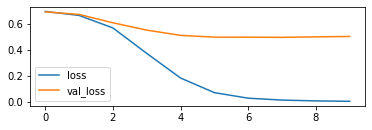

In [48]:
# Plot loss per iteration  
plt.subplot(211)
plt.plot(Training.history['loss'], label='loss')
plt.plot(Training.history['val_loss'], label='val_loss')

plt.legend()

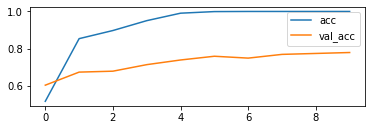

In [49]:
# Plot accuracy per iteration 
plt.subplot(212)
plt.plot(Training.history['accuracy'], label='acc')
plt.plot(Training.history['val_accuracy'], label='val_acc')

plt.legend()

In [50]:
loss, accuracy = model.evaluate(data_test, y_test, verbose=False)
print("Testing  Accuracy:  {:.4f}".format(accuracy))

Testing  Accuracy:  0.7925
